# Modeling for Time Series Data (4-5)
- Using robot_execution_failures data from tsfresh lib

##Objective 1 : processing stationarity steps  
- mean 
- variance
   
##Objective 2 : improving model performance 
- RandomForest
- XGBoost
- LightGBM)

In [1]:

%pip install tsfresh

from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, load_robot_execution_failures
download_robot_execution_failures()

Note: you may need to restart the kernel to use updated packages.


### #1 Dataset : robot_execution_failures  
- using MinimalFCParameters() 
- Model : LogisticRegression()

In [2]:
# loading robot execution dataset
timeseries, y = load_robot_execution_failures()

In [3]:
timeseries.shape, y.shape

((1320, 8), (88,))

In [4]:
timeseries.head(), y.head()

(   id  time  F_x  F_y  F_z  T_x  T_y  T_z
 0   1     0   -1   -1   63   -3   -1    0
 1   1     1    0    0   62   -3   -1    0
 2   1     2   -1   -1   61   -3    0    0
 3   1     3   -1   -1   63   -2   -1    0
 4   1     4   -1   -1   63   -3   -1    0,
 1    True
 2    True
 3    True
 4    True
 5    True
 dtype: bool)

## FSFRESH lib : 
Automatically extracts a large number of statistical features from time series.
Designed for ML models on tabular time series data (classification or regression).
- Feature-rich modeling (anomaly detection, classification, failure prediction)
- Situations where raw time series need to be turned into ML-friendly tabular features.
- Works well for supervised learning pipelines

In [5]:
from tsfresh import extract_features
extracted_features = extract_features(timeseries, column_id="id", column_sort="time")

Feature Extraction: 100%|██████████| 30/30 [00:41<00:00,  1.39s/it]


In [6]:
print(extracted_features.shape)
extracted_features.head()

(88, 4698)


,F_x__variance_larger_than_standard_deviation,F_x__has_duplicate_max,F_x__has_duplicate_min,F_x__has_duplicate,F_x__sum_values,F_x__abs_energy,F_x__mean_abs_change,F_x__mean_change,F_x__mean_second_derivative_central,F_x__median,...,T_z__fourier_entropy__bins_5,T_z__fourier_entropy__bins_10,T_z__fourier_entropy__bins_100,T_z__permutation_entropy__dimension_3__tau_1,T_z__permutation_entropy__dimension_4__tau_1,T_z__permutation_entropy__dimension_5__tau_1,T_z__permutation_entropy__dimension_6__tau_1,T_z__permutation_entropy__dimension_7__tau_1,T_z__query_similarity_count__query_None__threshold_0.0,T_z__mean_n_absolute_max__number_of_maxima_7
1,0.0,0.0,1.0,1.0,-14.0,14.0,0.142857,0.000000,-0.038462,-1.0,...,NaN,NaN,NaN,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,NaN,0.000000
2,0.0,1.0,1.0,1.0,-13.0,25.0,1.000000,0.000000,-0.038462,-1.0,...,1.073543,1.494175,2.079442,0.937156,1.234268,1.540306,1.748067,1.831020,NaN,0.571429
3,0.0,0.0,1.0,1.0,-10.0,12.0,0.714286,0.000000,-0.038462,-1.0,...,1.386294,1.732868,2.079442,1.265857,1.704551,2.019815,2.163956,2.197225,NaN,0.571429
4,0.0,1.0,1.0,1.0,-6.0,16.0,1.214286,-0.071429,-0.038462,0.0,...,1.073543,1.494175,2.079442,1.156988,1.907284,2.397895,2.302585,2.197225,NaN,1.000000
5,0.0,0.0,0.0,1.0,-9.0,17.0,0.928571,-0.071429,0.038462,-1.0,...,0.900256,1.320888,2.079442,1.156988,1.863680,2.271869,2.302585,2.197225,NaN,0.857143


In [7]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

# impute missing values
impute(extracted_features)

# select features 
features_filtered = select_features(extracted_features, y)

/Users/hb/miniconda3/envs/moduenv/lib/python3.12/site-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['F_x__partial_autocorrelation__lag_7'
 'F_x__partial_autocorrelation__lag_8'
 'F_x__partial_autocorrelation__lag_9' ...
 'T_z__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"mean"'
 'T_z__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"var"'
 'T_z__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn(


In [8]:
print(features_filtered.shape)
features_filtered.head()   

(88, 671)


,F_x__value_count__value_-1,F_x__abs_energy,F_x__root_mean_square,T_y__absolute_maximum,F_x__mean_n_absolute_max__number_of_maxima_7,F_x__range_count__max_1__min_-1,F_y__root_mean_square,F_y__abs_energy,F_y__mean_n_absolute_max__number_of_maxima_7,T_y__standard_deviation,...,"T_x__change_quantiles__f_agg_""var""__isabs_True__qh_0.2__ql_0.0","F_z__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.8",T_x__quantile__q_0.1,F_y__has_duplicate_max,T_y__lempel_ziv_complexity__bins_3,T_y__quantile__q_0.1,F_z__time_reversal_asymmetry_statistic__lag_1,F_x__quantile__q_0.2,F_y__quantile__q_0.7,"T_x__change_quantiles__f_agg_""var""__isabs_False__qh_0.2__ql_0.0"
1,14.0,14.0,0.966092,1.0,1.000000,15.0,0.930949,13.0,1.000000,0.471405,...,0.0,0.0,-3.0,1.0,0.400000,-1.0,-596.000000,-1.0,-1.0,0.0
2,7.0,25.0,1.290994,5.0,1.571429,13.0,2.250926,76.0,3.000000,2.054805,...,0.0,1.0,-9.2,1.0,0.533333,-3.6,-680.384615,-1.0,-1.0,0.0
3,11.0,12.0,0.894427,5.0,1.000000,14.0,1.632993,40.0,2.142857,1.768867,...,0.0,3.0,-6.6,0.0,0.533333,-4.0,-617.000000,-1.0,0.0,0.0
4,5.0,16.0,1.032796,6.0,1.285714,10.0,2.000000,60.0,2.428571,2.669998,...,0.0,0.0,-9.0,0.0,0.533333,-4.6,3426.307692,-1.0,1.0,0.0
5,9.0,17.0,1.064581,5.0,1.285714,13.0,1.751190,46.0,2.285714,2.039608,...,0.0,0.0,-9.6,0.0,0.466667,-5.0,-2609.000000,-1.0,0.8,0.0


In [9]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [10]:
# custom classification & split function
def custom_classification_split(x, y, test_size=0.3):
    num_true = int(y.sum()*test_size)           # int(21 * 0.3) = 6
    num_false = int((len(y)-y.sum())*test_size) # int((88 - 21)*0.3) = 20
    id_list = y[y==False].head(num_false).index.to_list() + y[y==True].head(num_true).index.to_list()
    y_train = y.drop(id_list)                            
    y_test = y.iloc[id_list].sort_index()               
    X_train = x[~x['id'].isin(id_list)] 
    X_test = x[x['id'].isin(id_list)]   

    return X_train, y_train, X_test, y_test

In [11]:
# splitting the dataset and check the result
X_train, y_train, X_test, y_test = custom_classification_split(timeseries, y)
print(X_train)
print('-'*50)
print(y_train)
print('-'*50)
print(X_test)
print('-'*50)
print(y_test)

      id  time  F_x  F_y  F_z  T_x  T_y  T_z
90     7     0   -3    1   53  -10   -4    0
91     7     1    0   -2   65   -4   -1    0
92     7     2   -1   -1   56   -7   -3    0
93     7     3    0   -2   60   -6    0    0
94     7     4   -1   -1   57   -7   -4    0
...   ..   ...  ...  ...  ...  ...  ...  ...
1315  88    10  -10    2   39  -21  -24    5
1316  88    11  -11    2   38  -24  -22    6
1317  88    12  -12    3   23  -24  -24    5
1318  88    13  -13    4   26  -29  -27    5
1319  88    14  -13    2   15  -25  -25    6

[930 rows x 8 columns]
--------------------------------------------------
7      True
8      True
9      True
10     True
11     True
      ...  
84    False
85    False
86    False
87    False
88    False
Length: 62, dtype: bool
--------------------------------------------------
     id  time  F_x  F_y  F_z  T_x  T_y  T_z
0     1     0   -1   -1   63   -3   -1    0
1     1     1    0    0   62   -3   -1    0
2     1     2   -1   -1   61   -3    0    0
3 

In [12]:
# feature extraction with minimal settings (default_fc_parameters)
from tsfresh import extract_features
from tsfresh.feature_extraction import MinimalFCParameters

settings = MinimalFCParameters() # for other options : ComprehensiveFCParameters() / ComprehensiveFCParameters()
minimal_features_train = extract_features(
                                X_train,
                                column_id="id",
                                column_sort="time",
                                default_fc_parameters=settings 
                           )

minimal_features_test = extract_features(
                                X_test,
                                column_id="id",
                                column_sort="time",
                                default_fc_parameters=settings 
                           )

Feature Extraction: 100%|██████████| 26/26 [00:09<00:00,  2.86it/s]


In [13]:
# check selected features
print(minimal_features_train.shape)
minimal_features_train.head()

(62, 60)


,F_z__sum_values,F_z__median,F_z__mean,F_z__length,F_z__standard_deviation,F_z__variance,F_z__root_mean_square,F_z__maximum,F_z__absolute_maximum,F_z__minimum,...,F_y__sum_values,F_y__median,F_y__mean,F_y__length,F_y__standard_deviation,F_y__variance,F_y__root_mean_square,F_y__maximum,F_y__absolute_maximum,F_y__minimum
7,882.0,57.0,58.800000,15.0,5.243409,27.493333,59.033324,70.0,70.0,50.0,...,-15.0,-1.0,-1.000000,15.0,0.894427,0.800000,1.341641,1.0,2.0,-2.0
8,887.0,60.0,59.133333,15.0,4.364503,19.048889,59.294182,69.0,69.0,50.0,...,2.0,0.0,0.133333,15.0,1.257864,1.582222,1.264911,3.0,3.0,-3.0
9,880.0,58.0,58.666667,15.0,4.027682,16.222222,58.804762,69.0,69.0,51.0,...,12.0,1.0,0.800000,15.0,1.833030,3.360000,2.000000,5.0,5.0,-2.0
10,946.0,63.0,63.066667,15.0,0.679869,0.462222,63.070331,64.0,64.0,61.0,...,-14.0,-1.0,-0.933333,15.0,0.249444,0.062222,0.966092,0.0,1.0,-1.0
11,938.0,63.0,62.533333,15.0,4.814792,23.182222,62.718418,70.0,70.0,52.0,...,-11.0,-1.0,-0.733333,15.0,2.542090,6.462222,2.645751,4.0,7.0,-7.0


In [14]:
minimal_features_train.columns

Index(['F_z__sum_values', 'F_z__median', 'F_z__mean', 'F_z__length',
       'F_z__standard_deviation', 'F_z__variance', 'F_z__root_mean_square',
       'F_z__maximum', 'F_z__absolute_maximum', 'F_z__minimum',
       'T_x__sum_values', 'T_x__median', 'T_x__mean', 'T_x__length',
       'T_x__standard_deviation', 'T_x__variance', 'T_x__root_mean_square',
       'T_x__maximum', 'T_x__absolute_maximum', 'T_x__minimum',
       'T_y__sum_values', 'T_y__median', 'T_y__mean', 'T_y__length',
       'T_y__standard_deviation', 'T_y__variance', 'T_y__root_mean_square',
       'T_y__maximum', 'T_y__absolute_maximum', 'T_y__minimum',
       'T_z__sum_values', 'T_z__median', 'T_z__mean', 'T_z__length',
       'T_z__standard_deviation', 'T_z__variance', 'T_z__root_mean_square',
       'T_z__maximum', 'T_z__absolute_maximum', 'T_z__minimum',
       'F_x__sum_values', 'F_x__median', 'F_x__mean', 'F_x__length',
       'F_x__standard_deviation', 'F_x__variance', 'F_x__root_mean_square',
       'F_x__maximu

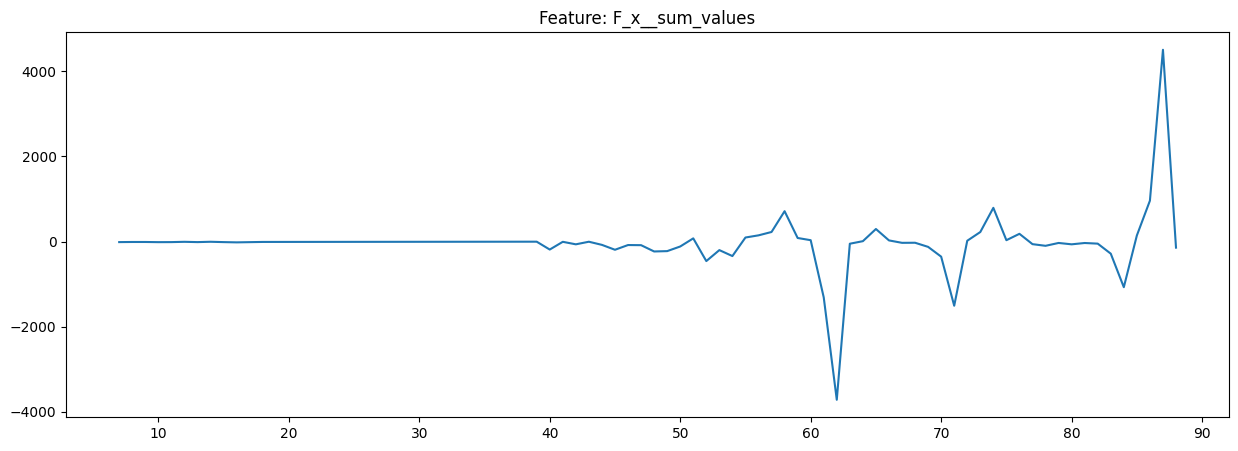

In [15]:
# plotting the features
plt.figure(figsize=(15, 5))
plt.title('Feature: F_x__sum_values')   
plt.plot(minimal_features_train['F_x__sum_values'])
plt.show()

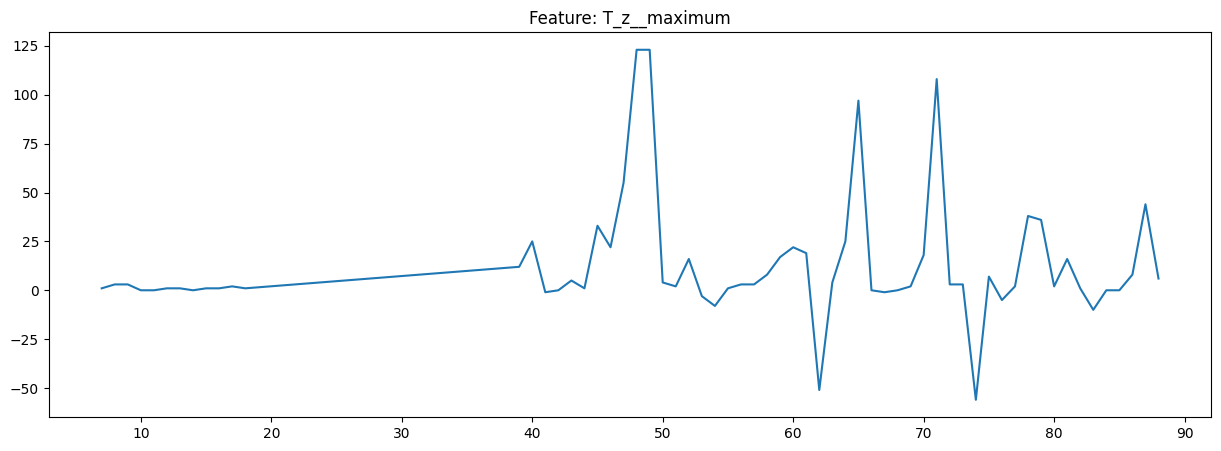

In [16]:
plt.figure(figsize=(15, 5))
plt.title('Feature: T_z__maximum') 
plt.plot(minimal_features_train['T_z__maximum'])
plt.show()

In [17]:
print(f"minimal_features_train: {minimal_features_train.shape}")
print(f"minimal_features_test: {minimal_features_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

# using Logistic Regression
logistic = LogisticRegression()
logistic.fit(minimal_features_train, y_train)

minimal_features_train: (62, 60)
minimal_features_test: (26, 60)
y_train: (62,)
y_test: (26,)


LogisticRegression()

In [18]:
# Logistic Regression score
logistic.score(minimal_features_test[minimal_features_train.columns], y_test)

0.8461538461538461

In [19]:
# model performance
classification_report(
	y_test,
	logistic.predict(minimal_features_test[minimal_features_train.columns]),
	target_names=['true', 'false'],
	output_dict=True
)

{'true': {'precision': 1.0,
  'recall': 0.8,
  'f1-score': 0.8888888888888888,
  'support': 20.0},
 'false': {'precision': 0.6, 'recall': 1.0, 'f1-score': 0.75, 'support': 6.0},
 'accuracy': 0.8461538461538461,
 'macro avg': {'precision': 0.8,
  'recall': 0.9,
  'f1-score': 0.8194444444444444,
  'support': 26.0},
 'weighted avg': {'precision': 0.9076923076923078,
  'recall': 0.8461538461538461,
  'f1-score': 0.8568376068376069,
  'support': 26.0}}

# 5 Time Series Data : Regression / Classification 

### #2 Dataset : airline-passengers.csv for prediction

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [21]:
import pandas as pd

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
ap = pd.read_csv(url)
print(ap.head())

     Month  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121


In [22]:
# 'Month' column을 삭제합니다.
ap = ap.drop('Month', axis=1)

In [23]:
print(f"dataset shape: {ap.shape}")

dataset shape: (144, 1)


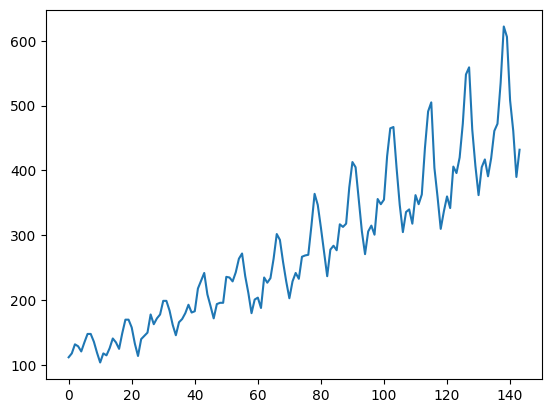

In [24]:
plt.figure()
plt.plot(ap)
plt.show()

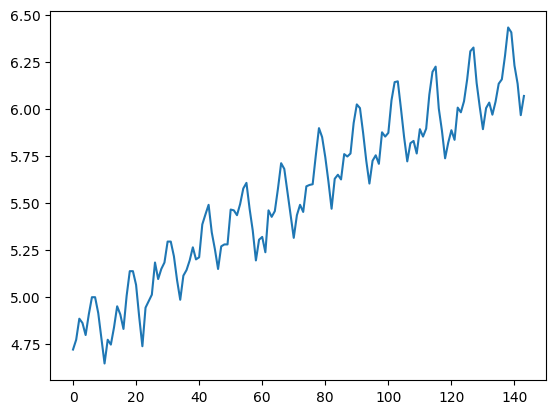

In [25]:
# to get stationary data set, use log transformation for variance stabilization

log_transformed = np.log(ap)
plt.plot(log_transformed)
plt.show()

In [26]:
log_transformed.head()

,Passengers
0,4.718499
1,4.770685
2,4.882802
3,4.859812
4,4.795791


In [27]:
# to remove trend, use differencing
# 1st order differencing
diffed = log_transformed.diff()

In [28]:
diffed.head()

,Passengers
0,NaN
1,0.052186
2,0.112117
3,-0.022990
4,-0.064022


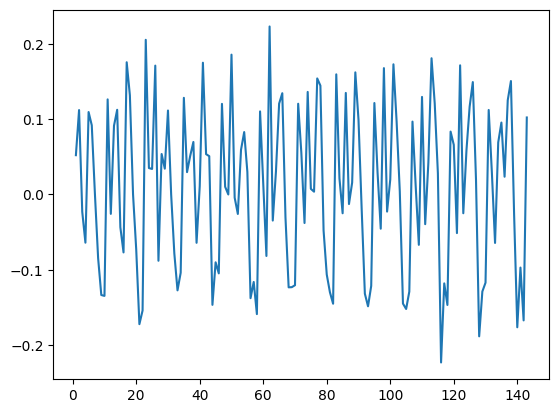

In [29]:

plt.figure()
plt.plot(diffed)
plt.show()

In [30]:
# to get 2nd order differencing, use the diff() with seasonal period
# 2nd order differencing 
seasonally_diffed = diffed.diff(12)
# drop NaN values
seasonally_diffed.dropna(inplace = True)

seasonally_diffed shape: (131, 1)


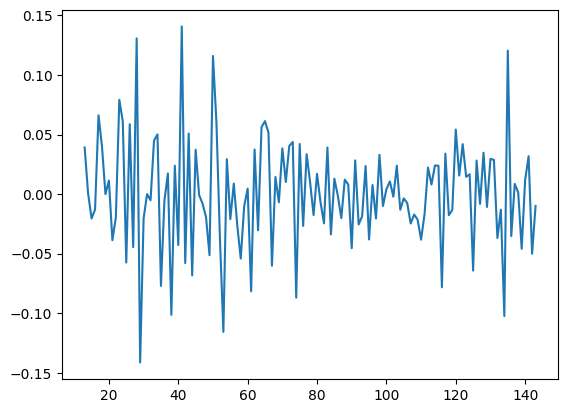

In [31]:
print(f"seasonally_diffed shape: {seasonally_diffed.shape}")
seasonally_diffed.head()

plt.figure()
plt.plot(seasonally_diffed)
plt.show()


In [32]:
from statsmodels.tsa.stattools import adfuller

def adf_test(x):
    stat, p_value, lags, nobs, crit, icb = adfuller(x)
    print(f'ADF statistics : {stat}') 
    print(f'P-value : {p_value}') 

In [33]:
# 
adf_test(seasonally_diffed)

ADF statistics : -4.443324941831123
P-value : 0.0002485912311384052


### #3 Dataset : robot_execution_failures for classification

In [34]:
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, load_robot_execution_failures

download_robot_execution_failures()
timeseries, y = load_robot_execution_failures()

In [35]:
print(f"timeseries shape: {timeseries.shape}")
print(f"y shape: {y.shape}")
print(timeseries.head())
print(y.head())

timeseries shape: (1320, 8)
y shape: (88,)
   id  time  F_x  F_y  F_z  T_x  T_y  T_z
0   1     0   -1   -1   63   -3   -1    0
1   1     1    0    0   62   -3   -1    0
2   1     2   -1   -1   61   -3    0    0
3   1     3   -1   -1   63   -2   -1    0
4   1     4   -1   -1   63   -3   -1    0
1    True
2    True
3    True
4    True
5    True
dtype: bool


In [36]:
def custom_classification_split(x,y,test_size=0.3): 
    num_true = int(y.sum()*test_size)
    num_false = int((len(y)-y.sum())*test_size)
    id_list = y[y==False].head(num_false).index.to_list() + y[y==True].head(num_true).index.to_list()
    y_train = y.drop(id_list)                           
    y_test = y.iloc[id_list].sort_index()              
    X_train = x[~x['id'].isin(id_list)]
    X_test = x[x['id'].isin(id_list)]  

    return X_train, y_train, X_test, y_test

In [37]:
# splitting the dataset with test_size=0.25
X_train, y_train, X_test, y_test = custom_classification_split(timeseries, y, test_size=0.25)

### TSFRESH lib, extract_features 
- MinimalFSPameters
- ComprehensiveFCParameters (to be used)
- EfficientFCParameters

In [38]:
from tsfresh import extract_features
from tsfresh.feature_extraction import ComprehensiveFCParameters #EfficientFCParameters
from tsfresh.utilities.dataframe_functions import impute

settings = ComprehensiveFCParameters() #EfficientFCParameters()

In [39]:
# feature extraction with ComprehensiveFCParameters()
comprehensive_features_train = extract_features(
                                    X_train,
                                    column_id="id",
                                    column_sort="time",
                                    default_fc_parameters=settings
                                          )

Feature Extraction: 100%|██████████| 29/29 [00:34<00:00,  1.20s/it]


In [40]:
comprehensive_features_test = extract_features(
                                    X_test,
                                    column_id="id",
                                    column_sort="time",
                                    default_fc_parameters=settings
                                          )

Feature Extraction: 100%|██████████| 26/26 [00:20<00:00,  1.26it/s]


In [41]:
# imputation 
impute(comprehensive_features_train)
impute(comprehensive_features_test)

/Users/hb/miniconda3/envs/moduenv/lib/python3.12/site-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['F_z__partial_autocorrelation__lag_7'
 'F_z__partial_autocorrelation__lag_8'
 'F_z__partial_autocorrelation__lag_9' ...
 'F_y__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"mean"'
 'F_y__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"var"'
 'F_y__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn(
/Users/hb/miniconda3/envs/moduenv/lib/python3.12/site-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['F_z__partial_autocorrelation__lag_7'
 'F_z__partial_autocorrelation__lag_8'
 'F_z__partial_autocorrelation__lag_9' ...
 'F_y__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"mean"'
 'F_y__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"var"'
 'F_y__query_similarity_count__query_None__threshold_0.0'] did not have any finite val

,F_z__variance_larger_than_standard_deviation,F_z__has_duplicate_max,F_z__has_duplicate_min,F_z__has_duplicate,F_z__sum_values,F_z__abs_energy,F_z__mean_abs_change,F_z__mean_change,F_z__mean_second_derivative_central,F_z__median,...,F_y__fourier_entropy__bins_5,F_y__fourier_entropy__bins_10,F_y__fourier_entropy__bins_100,F_y__permutation_entropy__dimension_3__tau_1,F_y__permutation_entropy__dimension_4__tau_1,F_y__permutation_entropy__dimension_5__tau_1,F_y__permutation_entropy__dimension_6__tau_1,F_y__permutation_entropy__dimension_7__tau_1,F_y__query_similarity_count__query_None__threshold_0.0,F_y__mean_n_absolute_max__number_of_maxima_7
1,1.0,1.0,0.0,1.0,938.0,58678.0,1.214286,0.071429,0.192308,63.0,...,0.562335,0.735622,1.213008,0.535961,0.566086,0.600166,0.639032,0.683739,0.0,1.000000
2,1.0,0.0,0.0,1.0,932.0,58190.0,5.571429,-0.285714,-0.269231,63.0,...,1.255482,1.494175,1.906155,1.697734,2.253858,2.397895,2.302585,2.197225,0.0,3.000000
3,1.0,0.0,0.0,1.0,917.0,56379.0,5.500000,-0.214286,-0.653846,61.0,...,1.320888,1.906155,2.079442,1.697734,2.369382,2.397895,2.302585,2.197225,0.0,2.142857
4,1.0,0.0,1.0,1.0,933.0,58253.0,4.714286,0.285714,-0.076923,63.0,...,1.494175,1.667462,1.906155,1.479133,2.253858,2.271869,2.302585,2.197225,0.0,2.428571
5,1.0,0.0,1.0,1.0,909.0,55437.0,5.857143,-0.571429,0.269231,59.0,...,1.320888,1.494175,1.906155,1.479133,2.369382,2.397895,2.302585,2.197225,0.0,2.285714
19,1.0,0.0,0.0,1.0,930.0,58452.0,8.071429,-1.071429,1.307692,62.0,...,1.073543,1.494175,1.906155,1.412745,1.979205,2.145842,2.302585,2.197225,0.0,17.142857
20,1.0,0.0,0.0,1.0,975.0,67045.0,10.071429,-3.785714,1.961538,61.0,...,0.735622,0.735622,1.255482,1.585771,2.138333,2.397895,2.302585,2.197225,0.0,18.142857
21,1.0,0.0,0.0,1.0,988.0,72912.0,22.571429,1.285714,-3.884615,64.0,...,1.494175,1.494175,1.906155,1.626021,2.253858,2.397895,2.302585,2.197225,0.0,12.857143
22,1.0,0.0,0.0,1.0,936.0,59376.0,9.571429,-1.857143,0.961538,60.0,...,0.735622,1.073543,1.386294,1.438883,1.820076,2.019815,2.163956,2.197225,0.0,20.285714
23,1.0,0.0,0.0,1.0,910.0,56466.0,6.571429,1.857143,-0.307692,61.0,...,1.073543,1.386294,2.079442,1.671595,2.369382,2.397895,2.302585,2.197225,0.0,7.571429


##Objective 2 : improving model performance (RandomForest, XGBoost, LightGBM)

In [42]:
# Classification report
from sklearn.metrics import classification_report

# using RandomForest 
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators = 10, max_depth = 3)

rf_clf.fit(comprehensive_features_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=10)

In [43]:
# Align test features to train features
rf_clf.score(comprehensive_features_test[comprehensive_features_train.columns], y_test)

0.9047619047619048

In [44]:
classification_report(
	y_test,
	rf_clf.predict(comprehensive_features_test[comprehensive_features_train.columns]),
	target_names=['true', 'false'],
	output_dict=True
)

{'true': {'precision': 1.0,
  'recall': 0.875,
  'f1-score': 0.9333333333333333,
  'support': 16.0},
 'false': {'precision': 0.7142857142857143,
  'recall': 1.0,
  'f1-score': 0.8333333333333334,
  'support': 5.0},
 'accuracy': 0.9047619047619048,
 'macro avg': {'precision': 0.8571428571428572,
  'recall': 0.9375,
  'f1-score': 0.8833333333333333,
  'support': 21.0},
 'weighted avg': {'precision': 0.9319727891156463,
  'recall': 0.9047619047619048,
  'f1-score': 0.9095238095238096,
  'support': 21.0}}

In [45]:
# using XGBoost
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(n_estimators = 10, max_depth = 3)

xgb_clf.fit(comprehensive_features_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=10,
              n_jobs=None, num_parallel_tree=None, ...)

In [46]:
xgb_clf.score(comprehensive_features_test, y_test)

0.8095238095238095

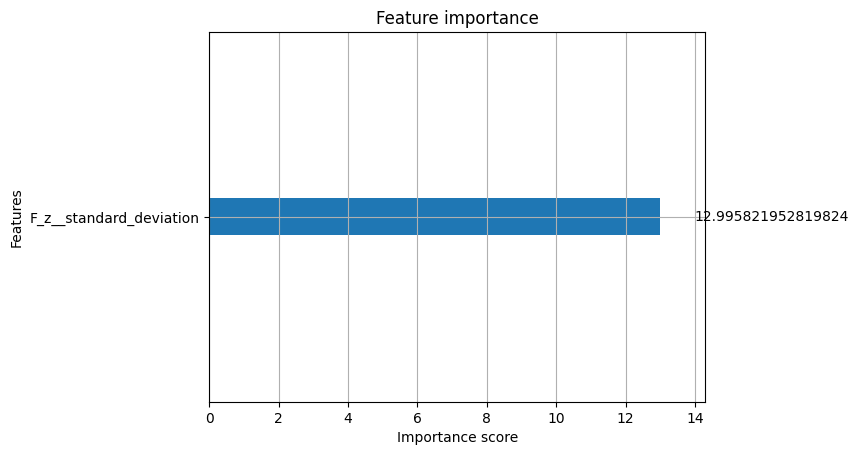

In [47]:
# visualizing XGBoost plot_importance 
xgb.plot_importance(xgb_clf, importance_type = 'gain')
plt.show()

In [48]:
# get top 10 features having highest importance score
feature_importances = xgb_clf.feature_importances_
feature_names = xgb_clf.get_booster().feature_names
top_idx = np.argsort(feature_importances)[::-1][:10]
top_features = [(feature_names[i], feature_importances[i]) for i in top_idx]
for name, score in top_features:
    print(f"{name}: {score}")
  
sum(xgb_clf.feature_importances_ != 0) 

F_z__standard_deviation: 1.0
F_y__mean_n_absolute_max__number_of_maxima_7: 0.0
T_y__has_duplicate_max: 0.0
T_x__permutation_entropy__dimension_5__tau_1: 0.0
T_x__permutation_entropy__dimension_6__tau_1: 0.0
T_x__permutation_entropy__dimension_7__tau_1: 0.0
T_x__query_similarity_count__query_None__threshold_0.0: 0.0
T_x__mean_n_absolute_max__number_of_maxima_7: 0.0
T_y__variance_larger_than_standard_deviation: 0.0
T_y__has_duplicate_min: 0.0


1

In [49]:
classification_report(y_test, xgb_clf.predict(comprehensive_features_test), target_names = ['true', 'false'], output_dict = True)

{'true': {'precision': 1.0,
  'recall': 0.75,
  'f1-score': 0.8571428571428571,
  'support': 16.0},
 'false': {'precision': 0.5555555555555556,
  'recall': 1.0,
  'f1-score': 0.7142857142857143,
  'support': 5.0},
 'accuracy': 0.8095238095238095,
 'macro avg': {'precision': 0.7777777777777778,
  'recall': 0.875,
  'f1-score': 0.7857142857142857,
  'support': 21.0},
 'weighted avg': {'precision': 0.8941798941798942,
  'recall': 0.8095238095238095,
  'f1-score': 0.8231292517006802,
  'support': 21.0}}

In [50]:

%pip install lightgbm scikit-learn

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb

# Sanitize feature names for LightGBM compatibility
# error : LightGBM not supporting special JSON characters (such as [ or ] or __ or other special symbols) in the feature names
# in the columns of your comprehensive_features_train DataFrame (as generated by tsfresh).
def sanitize_columns(df):
    df = df.copy()
    df.columns = [f"f_{i}" for i in range(df.shape[1])]
    print(f"column names : {df.columns}")
    return df

X_train_lgb = sanitize_columns(comprehensive_features_train)
X_test_lgb = sanitize_columns(comprehensive_features_test)

lgb_pipeline = Pipeline([
    ("clf", lgb.LGBMClassifier(random_state=42))
])

lgb_param_grid = {
    "clf__max_depth": [-1, 5],
    "clf__n_estimators": [50, 100],
    "clf__learning_rate": [0.05, 0.1]
}

lgb_grid = GridSearchCV(lgb_pipeline, lgb_param_grid, cv=3, scoring='f1_macro', verbose=1)
lgb_grid.fit(X_train_lgb, y_train)

print("\n📈 Best LightGBM Model Report")
lgb_preds = lgb_grid.predict(X_test_lgb)
print(classification_report(y_test, lgb_preds))

Note: you may need to restart the kernel to use updated packages.
column names : Index(['f_0', 'f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_7', 'f_8', 'f_9',
       ...
       'f_4688', 'f_4689', 'f_4690', 'f_4691', 'f_4692', 'f_4693', 'f_4694',
       'f_4695', 'f_4696', 'f_4697'],
      dtype='object', length=4698)
column names : Index(['f_0', 'f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_7', 'f_8', 'f_9',
       ...
       'f_4688', 'f_4689', 'f_4690', 'f_4691', 'f_4692', 'f_4693', 'f_4694',
       'f_4695', 'f_4696', 'f_4697'],
      dtype='object', length=4698)
Fitting 3 folds for each of 8 candidates, totalling 24 fits
[LightGBM] [Info] Number of positive: 10, number of negative: 34
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019362 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23837
[LightGBM] [Info] Number of data points in the train set: 44, number of used features: 1657
[LightGBM] [In